In [1]:
from helpers import *
import os
print(os.getcwd())

/home/workspace/2022.micro.artifact/experiments-maggie


In [2]:
verbose = True
architecture = "/home/workspace/2022.micro.artifact/experiments-maggie/arch.yaml"
component = "/home/workspace/2022.micro.artifact/experiments-maggie/compound_components.yaml"
ERT_output_path = "ERT.yaml"
ART_output_path = "ART.yaml"
workload = "/home/workspace/2022.micro.artifact/experiments-maggie/L07.yaml"
mapper = "/home/workspace/2022.micro.artifact/experiments-maggie/mapper.yaml"
mapping = "/home/workspace/2022.micro.artifact/experiments-maggie/timeloop_temp/timeloop-mapper.map.yaml"
constraints = "/home/workspace/2022.micro.artifact/experiments-maggie/constraints.yaml"

In [3]:
# Run Accelergy with the provided arguments
result = run_accelergy(
    architecture_yaml=architecture,
    component_yaml=component,
    ERT_output_path=ERT_output_path,
    ART_output_path=ART_output_path
)

print(f"Generated ERT file: {result['ERT']}")
print(f"Generated ART file: {result['ART']}")

Running Accelergy command: accelergy /home/workspace/2022.micro.artifact/experiments-maggie/arch.yaml /home/workspace/2022.micro.artifact/experiments-maggie/compound_components.yaml -o accelergy_temp -v 1
    _                _                      
   / \   ___ ___ ___| | ___ _ __ __ _ _   _ 
  / _ \ / __/ __/ _ \ |/ _ \ '__/ _` | | | |
 / ___ \ (_| (_|  __/ |  __/ | | (_| | |_| |
/_/   \_\___\___\___|_|\___|_|  \__, |\__, |
                                |___/ |___/ 

Info: generating outputs according to the following specified output flags... 
 Please use the -f flag to update the preference (default to all output files) 
{'ERT': 1, 'ERT_summary': 1, 'ART': 1, 'ART_summary': 1, 'energy_estimation': 1, 'flattened_arch': 1}
Info: config file located: /home/workspace/.config/accelergy/accelergy_config.yaml 
config file content: 
 {'version': 0.3, 'compound_components': [], 'estimator_plug_ins': ['/usr/local/share/accelergy/estimation_plug_ins'], 'primitive_components': ['/usr/local/s

In [4]:
# If you want mapper
# Run Timeloop mapper with the provided arguments
result = run_timeloop_mapper(
    architecture_yaml=architecture,
    workload=workload,
    ERT=ERT_output_path,
    ART=ART_output_path,
    output_mapping_path="searched_mapping.yaml",
    mapper=mapper,
    constraints=constraints
)

mapping_path = result["best_mapping"]

['timeloop-mapper', '/home/workspace/2022.micro.artifact/experiments-maggie/arch.yaml', '/home/workspace/2022.micro.artifact/experiments-maggie/L07.yaml', '/home/workspace/2022.micro.artifact/experiments-maggie/constraints.yaml', '/home/workspace/2022.micro.artifact/experiments-maggie/mapper.yaml', '--ERT', 'ERT.yaml', '--ART', 'ART.yaml', '-o', 'timeloop_temp']
  _______                __                
 /_  __(_)___ ___  ___  / /___  ____  ____ 
  / / / / __ `__ \/ _ \/ / __ \/ __ \/ __ \
 / / / / / / / / /  __/ / /_/ / /_/ / /_/ /
/_/ /_/_/ /_/ /_/\___/_/\____/\____/ .___/ 
                                  /_/      

Problem configuration complete.
Found Accelergy ERT (energy reference table), replacing internal energy model.
Found Accelergy ART (area reference table), replacing internal area model.
Architecture configuration complete.
Sparse optimization configuration complete.
Using threads = 4
Mapper configuration complete.
Initializing Index Factorization subspace.
  Factoriza

[  0] Utilization = 1.00 | pJ/Compute =  255.561 | L4[WIO] E32 - L3[] F4 - L2[] F2 - L1[] G1 - L0[] M64 C64 F4 
[  2] Utilization = 1.00 | pJ/Compute =  255.561 | L4[WIO] E2 - L3[] F4 - L2[] F2 - L1[] E2 - L0[] M64 C64 F4 E8 
[  1] Utilization = 1.00 | pJ/Compute =  255.561 | L4[WIO] E2 - L3[] F4 - L2[] F2 - L1[] G1 - L0[] M64 C64 F4 E16 
[  3] Utilization = 1.00 | pJ/Compute =  255.561 | L4[WIO] E2 - L3[] F4 - L2[] F2 - L1[] E16 - L0[] M64 C64 F4 
[  2] Utilization = 1.00 | pJ/Compute =  192.612 | L4[WIO] F4 - L3[] M64 F2 C32 - L2[] F2 - L1[W] E4 - L0[] C2 F2 E8 
[  2] Utilization = 1.00 | pJ/Compute =  192.599 | L4[WIO] F4 - L3[] M64 F2 C32 - L2[W] F2 - L1[] E4 - L0[] C2 F2 E8 
[  0] Utilization = 1.00 | pJ/Compute =  192.612 | L4[WIO] F4 - L3[] M64 F2 C32 - L2[] F2 - L1[W] E2 - L0[] C2 F2 E16 
[  0] Utilization = 1.00 | pJ/Compute =  192.599 | L4[WIO] F4 - L3[] M64 F2 C32 - L2[W] F2 - L1[] E2 - L0[] C2 F2 E16 
[  3] Utilization = 1.00 | pJ/Compute =  192.612 | L4[WIO] F4 - L3[] M64 



Summary stats for best mapping found by mapper:
  Utilization = 1.00 | pJ/Compute =   15.502


In [5]:
# If you already have mapping
output_path = run_timeloop(
    arch_yaml=architecture,
    workload=workload,
    mapping=mapping_path,
    constraints=constraints,
    mapper=mapper,
    ert_path=ERT_output_path,
    art_path=ART_output_path,
    output_dir="timeloop_output_test_3"
)

Running Timeloop:
timeloop-model /home/workspace/2022.micro.artifact/experiments-maggie/arch.yaml /home/workspace/2022.micro.artifact/experiments-maggie/L07.yaml searched_mapping.yaml --ERT ERT.yaml --ART ART.yaml -o timeloop_output_test_3
Timeloop completed successfully.


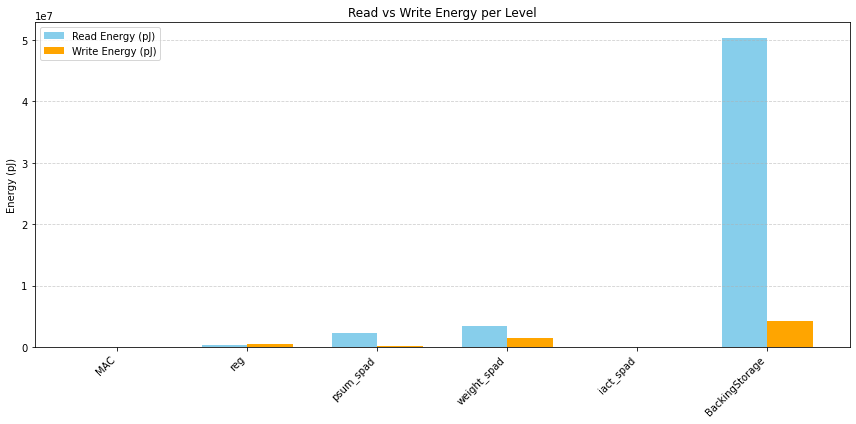

In [6]:
# Plot output
output = parse_timeloop_stats("timeloop_output_test_3/timeloop-model.map+stats.xml")
plot_read_write_energy(output["energy_breakdown_pJ"])